<a href="https://colab.research.google.com/github/electrojam/Curso-de-Estadistica-Inferencial-para-Data-Science-e-Inteligencia-Artificial/blob/main/Tipos_de_pruebas_de_hip%C3%B3tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importar las librerías necesarias para el análisis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

### De nuevo, usaremos la base de datos Iris

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names=names)
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Tipos de pruebas

### a) Distribución t de Student

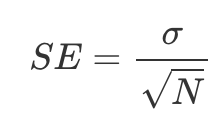

In [4]:
# SE = standard error
# N muestra

se_length = iris.std()['sepal-length']/np.sqrt(10)
se_width = iris.std()['sepal-width']/np.sqrt(10)

<ipython-input-4-8f4a3cd6dc99>:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  se_length = iris.std()['sepal-length']/np.sqrt(10)
<ipython-input-4-8f4a3cd6dc99>:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  se_width = iris.std()['sepal-width']/np.sqrt(10)


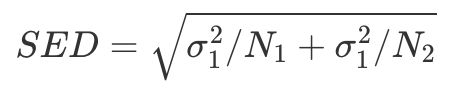

In [5]:
# SED = standard error desviation

sed = np.sqrt((se_length**2)+(se_width**2))

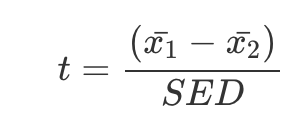 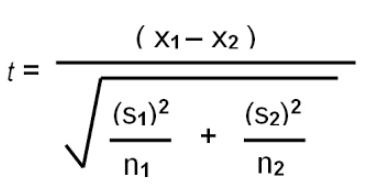

In [6]:
t_stat = (iris.mean()['sepal-length']-iris.mean()['sepal-width'])/sed
t_stat

<ipython-input-6-906994a1a2e5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  t_stat = (iris.mean()['sepal-length']-iris.mean()['sepal-width'])/sed
<ipython-input-6-906994a1a2e5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  t_stat = (iris.mean()['sepal-length']-iris.mean()['sepal-width'])/sed


9.436693738890318

In [7]:
p = ttest_ind(iris['sepal-length'], iris['sepal-width'])
p

TtestResult(statistic=36.548157693982006, pvalue=3.987838114848222e-112, df=298.0)

#### Se rechaza hipótesis nula porque el valor de t es mucho mayor que pvalue, es decir que la distribución entre las dos variables sepal-length y sepal-width son muy diferentes.

### b) Correlación y coeficiente de Pearson

In [16]:
iris['sepal-length'].corr(iris['sepal-width'])  # calculamos correlación entre las variables sepal length y width

# el valor resultando significa que es una correlación muy débil o inexistente, se rechaza hipótesis nula (las variables tienen distribuciones similares).

-0.10936924995064937

In [17]:
# Calculamos coeficiente de Pearson
st.pearsonr(iris['sepal-length'], iris['sepal-width'])

# con estos valores pequeños no hay correlación entre las variables, se rechaza hipótesis nula (las variables tienen distribuciones similares).

PearsonRResult(statistic=-0.10936924995064937, pvalue=0.18276521527136963)

### c) Análisis de la varianza (ANOVA)

In [18]:
f_oneway(iris['sepal-length'], iris['sepal-width'])

# con los valores arrojados, pavlue es muy pequeño con el valor de signifancia 0.05, se rechaza hipótesis nula (las variables tienen distribuciones similares).

F_onewayResult(statistic=1335.7678308241748, pvalue=3.9878381148486907e-112)

#### RETO: Prueba de hipótesis, verificar la relación entre sepal-length y petal-length

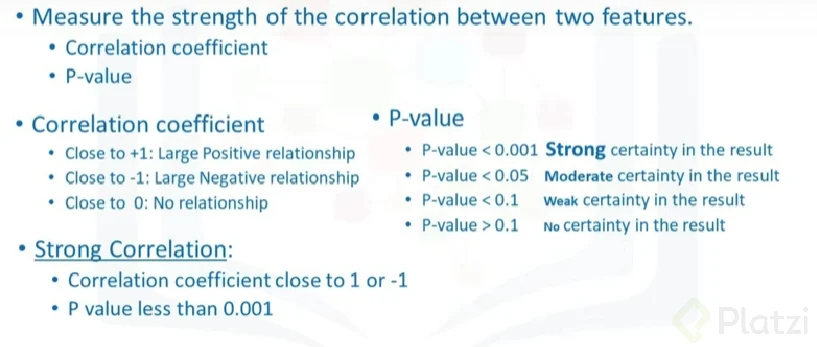

##### a) Distribución de t de student

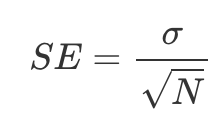

In [25]:
se_sepal_length = iris.std()['sepal-length']/np.sqrt(10)
se_petal_length = iris.std()['petal-length']/np.sqrt(10)

<ipython-input-25-a7f16b9fd4e1>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  se_sepal_length = iris.std()['sepal-length']/np.sqrt(10)
<ipython-input-25-a7f16b9fd4e1>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  se_petal_length = iris.std()['petal-length']/np.sqrt(10)


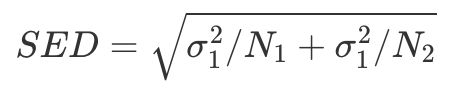

In [29]:
# sed = standard error desviation

sed = np.sqrt((se_sepal_length**2) + (se_petal_length**2))
sed

0.6163499761214215

#### x̅ = medias muestrales
#### s1^x y s2^x = Varianzas de cada muestra
#### n1 y n2 = número de observaciones de cada muestra

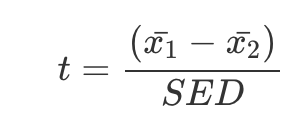

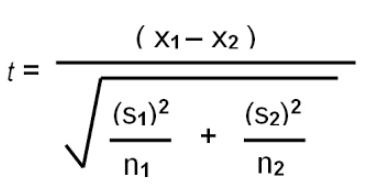



In [27]:
t_stat = (iris.mean()['sepal-length'] - iris.mean()['petal-length'])/sed
t_stat

<ipython-input-27-1e5df348e164>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  t_stat = (iris.mean()['sepal-length'] - iris.mean()['petal-length'])/sed
<ipython-input-27-1e5df348e164>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  t_stat = (iris.mean()['sepal-length'] - iris.mean()['petal-length'])/sed


3.3822775167204457

In [28]:
p = ttest_ind(iris['sepal-length'], iris['petal-length'])
p

TtestResult(statistic=13.099504494510061, pvalue=2.8297338637366177e-31, df=298.0)

##### Se rechaza hipótesis nula porque el valor de t es mucho mayor que pvalue, es decir que la distribución entre las dos variables sepal-length y sepal-width son muy diferentes

#### b) Correlación y coeficiente de **Pearson**

In [31]:
iris['sepal-length'].corr(iris['petal-length']) # calculamos correlación entre las variables sepal length y width

# el valor resultante significa que es una correlación existente, se acepta hipótesis nula (las variables tienen distribuciones simi

0.8717541573048718

In [33]:
st.pearsonr(iris['sepal-length'], iris['petal-length'])


PearsonRResult(statistic=0.8717541573048713, pvalue=1.0384540627941024e-47)

#### c) Análisis de la varianza (ANOVA)

In [34]:
f_oneway(iris['sepal-length'], iris['petal-length'])

# con los valores arrojados, pavlue es muy pequeño con el valor de signifancia 0.05, se rechaza hipótesis nula (las variables tienen distribuciones similares).

F_onewayResult(statistic=171.59701800168915, pvalue=2.829733863736772e-31)